# Laboratorio 2: Condicionamiento
## Cálculo del número de condición de una matriz

In [1]:
import numpy as np
### numero de condicion ######
from numpy import linalg as LA
a = np.array([[1, 0, -1], [0, 1, 0], [1, 0, 1]])
print(a)
LA.cond(a)
LA.cond(a, 'fro')

[[ 1  0 -1]
 [ 0  1  0]
 [ 1  0  1]]


3.1622776601683795

## Matriz mal condicionada 

In [2]:
a = np.array([[1, -.01], [2, .01]])
print(LA.cond(a))
#### queremos resolver ax=y
####                   (a+da)x=y
y = np.array([2,1]).reshape((2, 1))
da= np.array([[0, 0], [0, .005]])
x0 = np.linalg.solve(a, y)
x1 = np.linalg.solve(a+da, y)

print(x0)

print(x1)



166.6673333573341
[[   1.]
 [-100.]]
[[  1.14285714]
 [-85.71428571]]


## Número de condición de una función

68223681.27145708


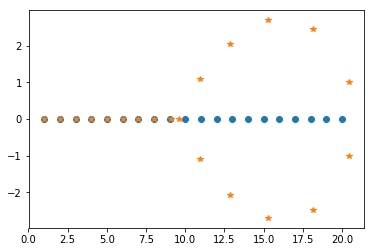

In [6]:
### numero de condicion de una funcion######
w_roots=np.arange(1,21)
W=np.poly(w_roots)
perturb=np.zeros_like(W)
perturb[1]=1e-7
W_perturb = W + perturb
perturbed_roots=np.roots(W_perturb)
w_roots = np.sort(w_roots)
perturbed_roots = np.sort(perturbed_roots)
print((LA.norm(perturbed_roots-w_roots)/
    LA.norm(perturb)))
######################################################
# Esta directiva habilita los graficos en notebook 
%matplotlib inline
######################################################
import matplotlib.pyplot as plt
plt.plot(w_roots,np.zeros_like(w_roots),'o')
plt.plot(perturbed_roots.real,perturbed_roots.imag,'*')
plt.show()